<a href="https://colab.research.google.com/github/radwahashiesh/machineLearning_breastCancer/blob/main/upnormalpreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# multiClass

# Libraries 

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
import glob
import cv2
import numpy as np
import matplotlib.pyplot  as plt 
from scipy.signal import convolve2d
import scipy.misc
import scipy.ndimage
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import precision_score, confusion_matrix,recall_score, f1_score, cohen_kappa_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from scipy.signal import convolve2d
import scipy.misc
import scipy.ndimage
from scipy import stats

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Print the confusion matrix using Matplotlib
def cm(y_test, y_pred,name):
 title="confusion matrix of "+ name
 conf_matrix = confusion_matrix(y_test, y_pred)
 fig, ax = plt.subplots(figsize=(5, 5))
 ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
 for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 plt.xlabel('Predictions', fontsize=18)
 plt.ylabel('Actuals', fontsize=18)
 plt.title(title, fontsize=18)
 plt.show()

In [ ]:
def performance(y_test, y_pred):
  p= precision_score(y_test, y_pred,average='weighted')
  r=recall_score(y_test, y_pred,average='weighted')
  a=accuracy_score(y_test, y_pred)
  f1=f1_score(y_test, y_pred,average='weighted')
  
  return  p,r,a,f1


In [ ]:
Categories=['benign','malignant',]
flat_data_arr=[]
#input array
target_arr=[]
#output array
datadir='/content/drive/MyDrive/graduation_project/dataset/dataset/'
 
#path which contains all the categories of images
for i in Categories:
    
   print(f'loading... category : {i}')   
   path=os.path.join(datadir,i) 
   for img in os.listdir(path):  
      img_array=imread(os.path.join(path,img)) 
      img_resized=resize(img_array,(128,128,3)) 
      gray = cv2.cvtColor(np.float32(img_resized), cv2.COLOR_RGB2GRAY)
      #grayimg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      #img=scipy.ndimage.gaussian_filter(img_resized, 5)
      #img1= cv2.Laplacian(img_resized,cv2.CV_64F)
      #sobelx = cv2.Sobel(img_resized,cv2.CV_64F,1,0,ksize=5)  # x
      #sobely = cv2.Sobel(img_resized,cv2.CV_64F,0,1,ksize=5)  # y
      #sobel=sobelx+sobely
      #kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
      #kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
      #img_prewittx = cv2.filter2D(img, -1, kernelx)
      #img_prewitty = cv2.filter2D(img, -1, kernely)
      #img_prewitt=img_prewittx + img_prewitty
      flat_data_arr.append(gray)   
      target_arr.append(Categories.index(i))   
      print(f'loaded category:{i} successfully')
      target=np.array(target_arr)


loading... category : benign
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully
loaded category:benign successfully

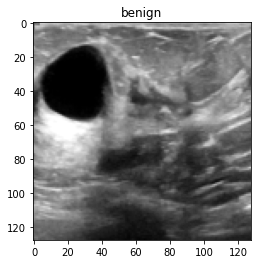

In [ ]:
plt.imshow(flat_data_arr[250],cmap='gray')
plt.title(Categories[target[250]])
plt.show()

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
def cannny(i):
  i=(i*255).astype(np.uint8)
  edges = cv.Canny(i,100,200)
  return edges
canny=[]
for i in flat_data_arr:
  x=cannny(i)
  canny.append(x)
 

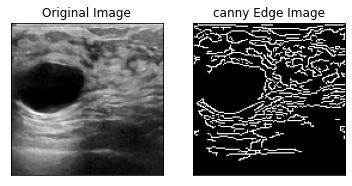

In [ ]:
plt.subplot(121),plt.imshow(flat_data_arr[5],cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny[5],cmap = 'gray')
plt.title('canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
x=[]
for i in canny:
  x.append(i.flatten())
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, target, test_size = 0.3, random_state = 42,stratify=target)

In [ ]:
#Feature Scalingfrom sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

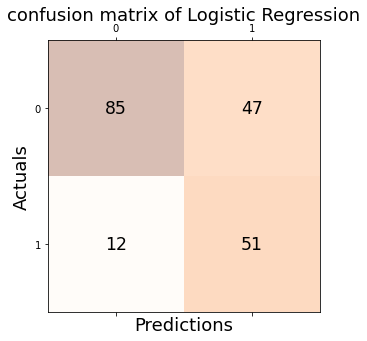

In [ ]:

#Using Logistic Regression Algorithm to the Training Setfrom sklearn.linear_model import LogisticRegression
classifierlr = LogisticRegression(penalty='l2', solver='liblinear')
classifierlr.fit(X_train, Y_train)
grid_predictionslr = classifierlr.predict(X_test) 
cm(Y_test, grid_predictionslr,"Logistic Regression")
p1,r1,a1,f1=performance(Y_test, grid_predictionslr)

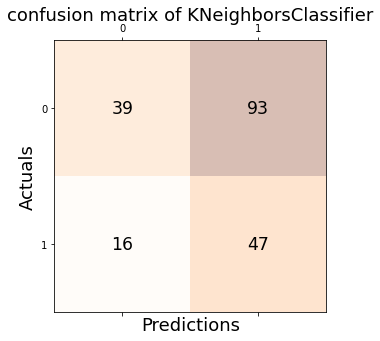

In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithmfrom sklearn.neighbors import KNeighborsClassifier
classifierknn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierknn.fit(X_train, Y_train)
grid_predictionsknn = classifierknn.predict(X_test) 
cm(Y_test, grid_predictionsknn,"KNeighborsClassifier")
p2,r2,a2,f2=performance(Y_test, grid_predictionsknn)

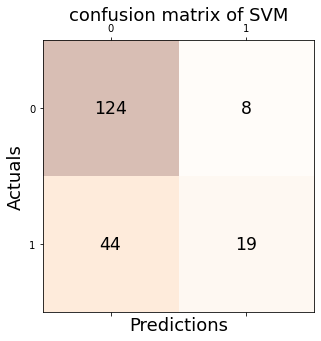

In [ ]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifiersvm = SVC(kernel = 'rbf')
classifiersvm.fit(X_train, Y_train)
grid_predictionssvm = classifiersvm.predict(X_test) 

cm(Y_test, grid_predictionssvm,"SVM")
p3,r3,a3,f3=performance(Y_test, grid_predictionssvm)

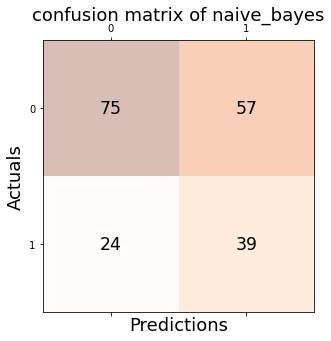

In [ ]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifiernb = GaussianNB()
classifiernb.fit(X_train, Y_train)

grid_predictionsnb = classifiernb.predict(X_test) 
cm(Y_test, grid_predictionsnb,"naive_bayes")
p4,r4,a4,f4=performance(Y_test, grid_predictionsnb)

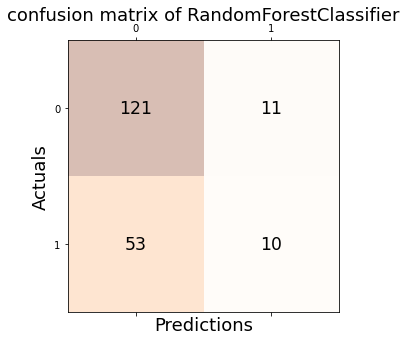

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
classifierrf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifierrf.fit(X_train, Y_train)
grid_predictionsrf = classifierrf.predict(X_test) 
cm(Y_test, grid_predictionsrf,"RandomForestClassifier")
p5,r5,a5,f5=performance(Y_test, grid_predictionsrf)

In [ ]:
from tabulate import tabulate
data = [["Logistic Regression",p1,r1,a1,f1],
["K Neighbors Classifier", p2,r2,a2,f2],
["Support Vector Machine",p3,r3,a3,f3],
[ "Naïve Bayes Classifier",p4,r4,a4,f4],
 ["Random Forest Classifier" ,p5,r5,a5,f5]
]
print (tabulate(data, headers=["Classifier","precision","recall","accuracy","f1_score"]))

Classifier                  precision    recall    accuracy    f1_score
------------------------  -----------  --------  ----------  ----------
Logistic Regression          0.761312  0.697436    0.697436    0.707202
K Neighbors Classifier       0.588462  0.441026    0.441026    0.431955
Support Vector Machine       0.726984  0.733333    0.733333    0.696
Naïve Bayes Classifier       0.644071  0.584615    0.584615    0.598051
Random Forest Classifier     0.62458   0.671795    0.671795    0.612267
